In [189]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train,txt 파일 불러오기

In [190]:
train = open("./drive/MyDrive/mnist_train.txt", 'r')
train_list = train.readlines()
train_list = list(map(lambda s: s.strip(), train_list))
train.close()

In [191]:
test = open("./drive/MyDrive/mnist_test.txt", 'r')
test_list = test.readlines()
test_list = list(map(lambda s: s.strip(), test_list))
test.close()

train,test 파일 함수로 가공하기

In [192]:
def Transfer_images(Transfer):
  Transfer = [arr.split() for arr in Transfer]
  list2 = np.concatenate(Transfer).tolist()
  n = 785

  result1 = [list2[i * n:(i + 1) * n] for i in range((len(list2) - 1 + n) // n )]
  df= pd.DataFrame(result1)
  test = df[0]
  df = df.drop(0, axis=1)
  x_Transfer = np.array(df, dtype='uint8')
  x_Transfer = x_Transfer.reshape(len(x_Transfer),28,28)
  return x_Transfer

In [193]:
def Transfer_labels(Transfer):
  Transfer = [arr.split() for arr in Transfer]
  list2 = np.concatenate(Transfer).tolist()
  n = 785

  result1 = [list2[i * n:(i + 1) * n] for i in range((len(list2) - 1 + n) // n )]
  df= pd.DataFrame(result1)
  test = df[0]
  df = df.drop(0, axis=1)
  y_Transfer = np.array(test, dtype='uint8')
  return y_Transfer

In [194]:
x_train = Transfer_images(train_list)
y_train = Transfer_labels(train_list)
x_test = Transfer_images(test_list)
y_test = Transfer_labels(test_list)

In [195]:
x_train.shape

(60000, 28, 28)

이미지 확인

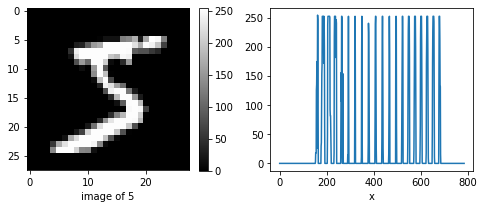

In [196]:
pick_image = 0 # 0 ~ 59999

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)

# 이미지(image) 확인
plt.imshow(x_train[pick_image], cmap='gray')
plt.colorbar()
plt.xlabel('image of {}'.format(y_train[pick_image]))
plt.subplot(1,2,2)

# 픽셀(pixel)값 분포
plt.plot(x_train[0].flatten())
plt.xlabel('x')
plt.show()

In [197]:
print("x_train shape = ",x_train.shape)

x_train shape =  (60000, 28, 28)


In [198]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
x_train1, x_val, y_train1, y_val = train_test_split(
    x_train,y_train,test_size=0.2, random_state=42)

In [201]:
from tensorflow.keras.utils import to_categorical
Y_train1 = to_categorical(y_train1, 10)
Y_test = to_categorical(y_test, 10)
Y_val = to_categorical(y_val, 10)
print("Y Training matrix shape", Y_train1.shape)

Y Training matrix shape (48000, 10)


In [202]:
X_train1 = x_train1.reshape(48000,784)
X_test = x_test.reshape(10000,784)
X_val = x_val.reshape(12000,784)
X_train1 = X_train1.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train1 /= 255
X_test /= 255
X_val /= 255

In [203]:

X_val.shape

(12000, 784)

In [204]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,Activation

In [205]:
model = Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 512)               401920    
                                                                 
 activation_21 (Activation)  (None, 512)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               131328    
                                                                 
 activation_22 (Activation)  (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 10)                2570      
                                                                 
 activation_23 (Activation)  (None, 10)                0         
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-tr

In [206]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train1,Y_train1,batch_size=128,epochs=10,verbose=1)

Epoch 1/10
375/375 [==============================] - 7s 18ms/step - loss: 0.2563 - accuracy: 0.9234
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0949 - accuracy: 0.9716
Epoch 3/10
375/375 [==============================] - 7s 17ms/step - loss: 0.0560 - accuracy: 0.9828
Epoch 4/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0408 - accuracy: 0.9870
Epoch 5/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0275 - accuracy: 0.9910
Epoch 6/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0231 - accuracy: 0.9927
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0192 - accuracy: 0.9935
Epoch 8/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 9/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 10/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0114 - accura

In [207]:
score= model.evaluate(X_val,Y_val)

375/375 [==============================] - 2s 6ms/step - loss: 0.0939 - accuracy: 0.9791


validation 수행

In [208]:
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

Test loss :  0.0938531830906868
Test accuracy :  0.9790833592414856


In [209]:
score= model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0844 - accuracy: 0.9794


test 수행

In [210]:
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

Test loss :  0.08440784364938736
Test accuracy :  0.9793999791145325


예측값 확인

Predict: 1


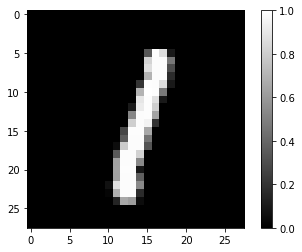

In [211]:
pick_image_idx = 150
pick_image = np.reshape(X_train1[pick_image_idx], (1, 784))
predict_result = np.argmax(model.predict(pick_image))
print("Predict: " + str(predict_result))

image = np.reshape(X_train1[pick_image_idx], (28, 28))
plt.imshow(image, cmap='gray')
plt.clim(0, 1)
plt.colorbar()
plt.show()

오류 예제들 출력

[errpr exalple0]
target : 9
Prediction : 5


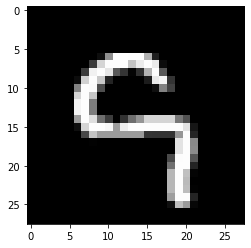

-----------------------------------------------
[errpr exalple1]
target : 4
Prediction : 9


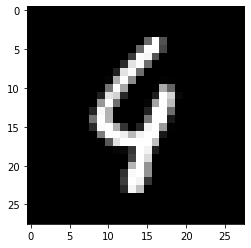

-----------------------------------------------
[errpr exalple2]
target : 2
Prediction : 9


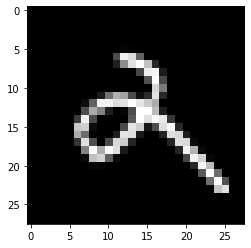

-----------------------------------------------
[errpr exalple3]
target : 9
Prediction : 8


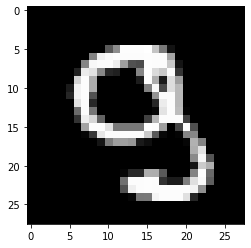

-----------------------------------------------
[errpr exalple4]
target : 8
Prediction : 2


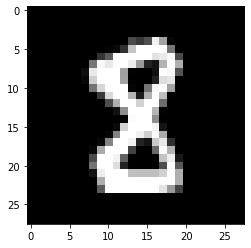

-----------------------------------------------
[errpr exalple5]
target : 6
Prediction : 5


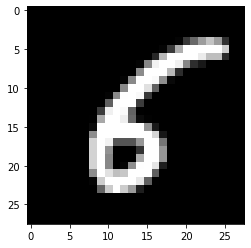

-----------------------------------------------
[errpr exalple6]
target : 9
Prediction : 8


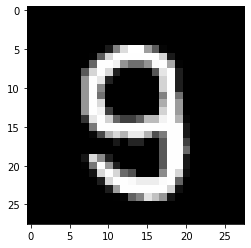

-----------------------------------------------
[errpr exalple7]
target : 4
Prediction : 2


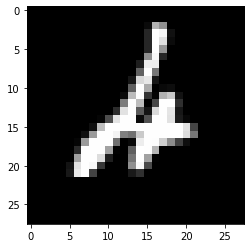

-----------------------------------------------
[errpr exalple8]
target : 9
Prediction : 3


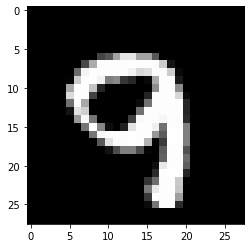

-----------------------------------------------
[errpr exalple9]
target : 2
Prediction : 7


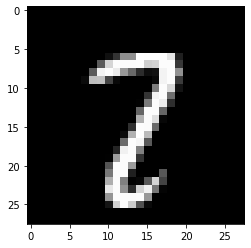

-----------------------------------------------
[errpr exalple10]
target : 5
Prediction : 3


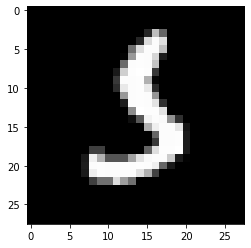

-----------------------------------------------
[errpr exalple11]
target : 8
Prediction : 2


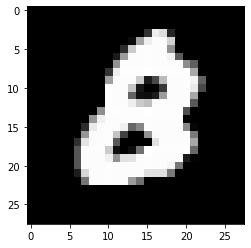

-----------------------------------------------
[errpr exalple12]
target : 8
Prediction : 2


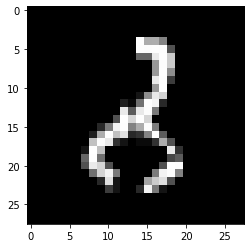

-----------------------------------------------
[errpr exalple13]
target : 1
Prediction : 8


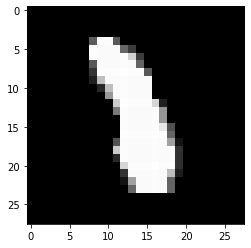

-----------------------------------------------
[errpr exalple14]
target : 6
Prediction : 4


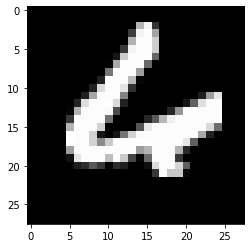

-----------------------------------------------
[errpr exalple15]
target : 2
Prediction : 7


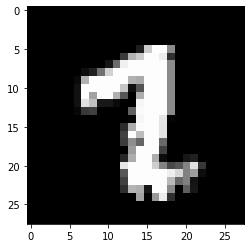

-----------------------------------------------
[errpr exalple16]
target : 8
Prediction : 4


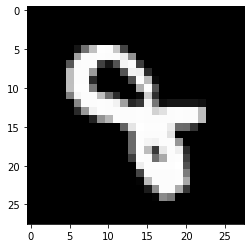

-----------------------------------------------
[errpr exalple17]
target : 5
Prediction : 8


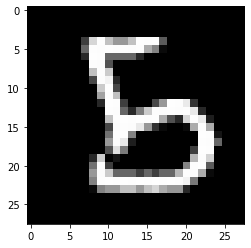

-----------------------------------------------
[errpr exalple18]
target : 9
Prediction : 8


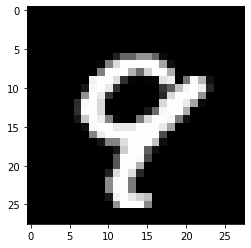

-----------------------------------------------
[errpr exalple19]
target : 0
Prediction : 2


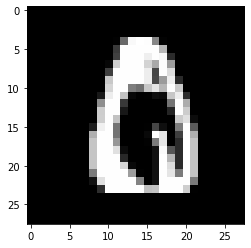

-----------------------------------------------
[errpr exalple20]
target : 1
Prediction : 3


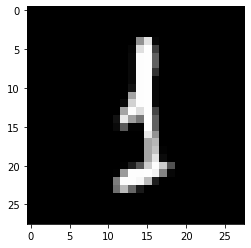

-----------------------------------------------
[errpr exalple21]
target : 5
Prediction : 4


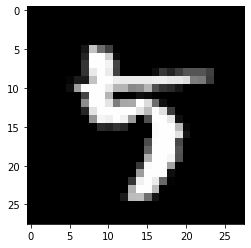

-----------------------------------------------
[errpr exalple22]
target : 1
Prediction : 2


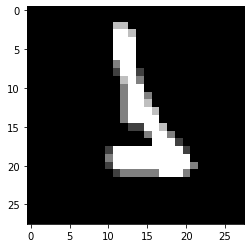

-----------------------------------------------
[errpr exalple23]
target : 9
Prediction : 7


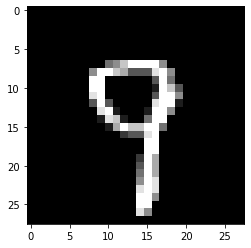

-----------------------------------------------
[errpr exalple24]
target : 6
Prediction : 5


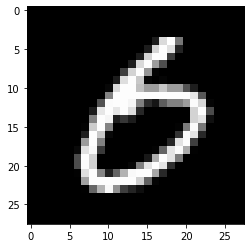

-----------------------------------------------
[errpr exalple25]
target : 6
Prediction : 5


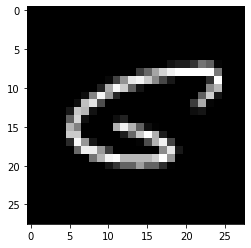

-----------------------------------------------
[errpr exalple26]
target : 9
Prediction : 5


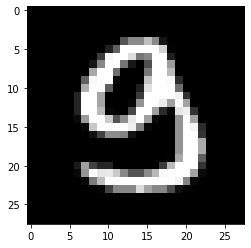

-----------------------------------------------
[errpr exalple27]
target : 7
Prediction : 8


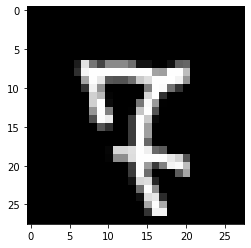

-----------------------------------------------
[errpr exalple28]
target : 7
Prediction : 2


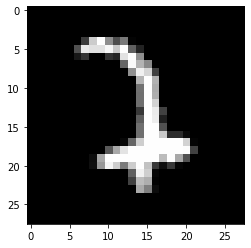

-----------------------------------------------
[errpr exalple29]
target : 9
Prediction : 4


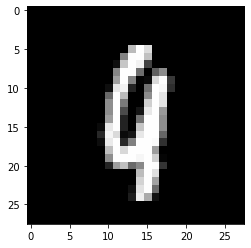

-----------------------------------------------
[errpr exalple30]
target : 4
Prediction : 9


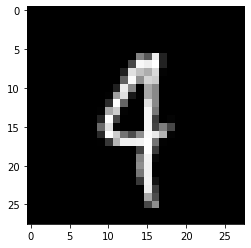

-----------------------------------------------
[errpr exalple31]
target : 9
Prediction : 5


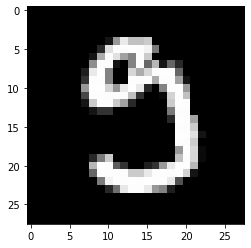

-----------------------------------------------
[errpr exalple32]
target : 7
Prediction : 1


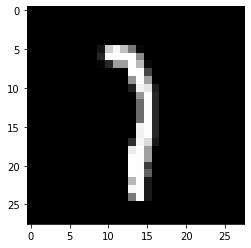

-----------------------------------------------
[errpr exalple33]
target : 5
Prediction : 7


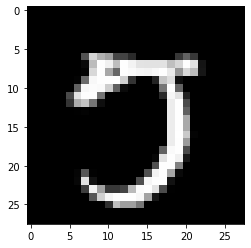

-----------------------------------------------
[errpr exalple34]
target : 8
Prediction : 3


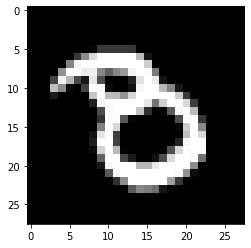

-----------------------------------------------
[errpr exalple35]
target : 8
Prediction : 2


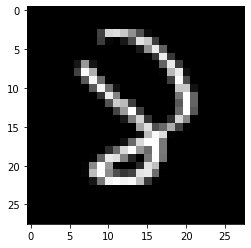

-----------------------------------------------
[errpr exalple36]
target : 5
Prediction : 3


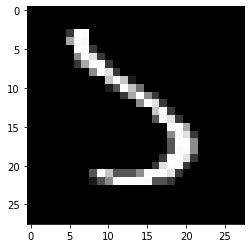

-----------------------------------------------
[errpr exalple37]
target : 2
Prediction : 3


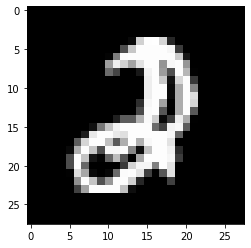

-----------------------------------------------
[errpr exalple38]
target : 9
Prediction : 7


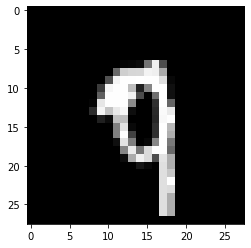

-----------------------------------------------
[errpr exalple39]
target : 8
Prediction : 2


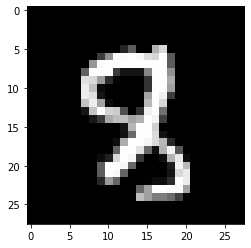

-----------------------------------------------
[errpr exalple40]
target : 7
Prediction : 9


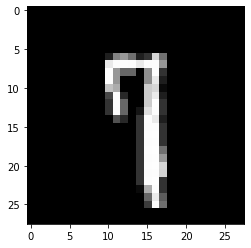

-----------------------------------------------
[errpr exalple41]
target : 8
Prediction : 7


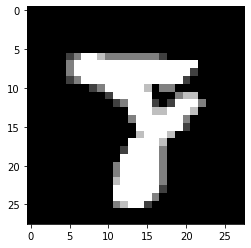

-----------------------------------------------
[errpr exalple42]
target : 4
Prediction : 2


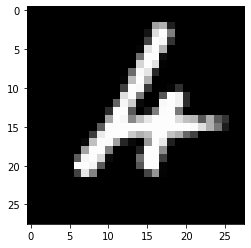

-----------------------------------------------
[errpr exalple43]
target : 6
Prediction : 0


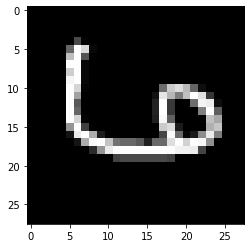

-----------------------------------------------
[errpr exalple44]
target : 2
Prediction : 6


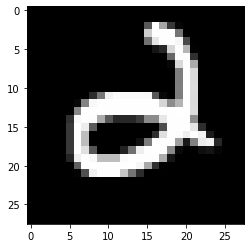

-----------------------------------------------
[errpr exalple45]
target : 0
Prediction : 6


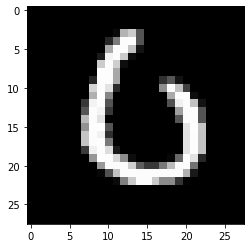

-----------------------------------------------
[errpr exalple46]
target : 3
Prediction : 7


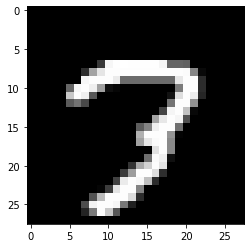

-----------------------------------------------
[errpr exalple47]
target : 9
Prediction : 5


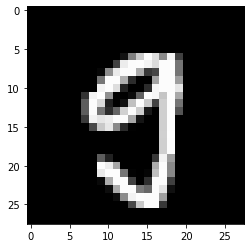

-----------------------------------------------
[errpr exalple48]
target : 0
Prediction : 7


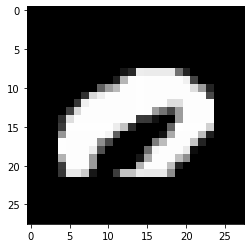

-----------------------------------------------
[errpr exalple49]
target : 6
Prediction : 4


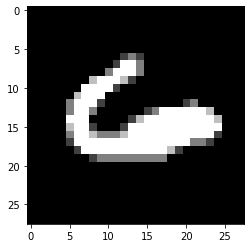

-----------------------------------------------
[errpr exalple50]
target : 8
Prediction : 2


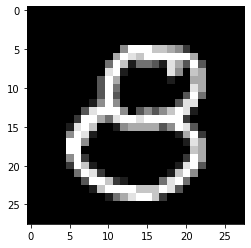

-----------------------------------------------
[errpr exalple51]
target : 8
Prediction : 3


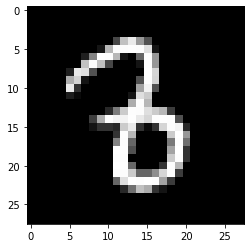

-----------------------------------------------
[errpr exalple52]
target : 9
Prediction : 4


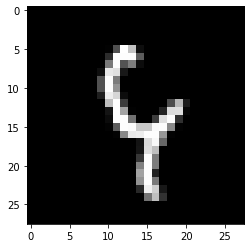

-----------------------------------------------
[errpr exalple53]
target : 1
Prediction : 7


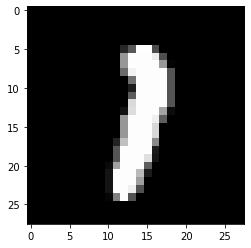

-----------------------------------------------
[errpr exalple54]
target : 7
Prediction : 2


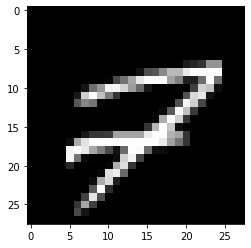

-----------------------------------------------
[errpr exalple55]
target : 8
Prediction : 2


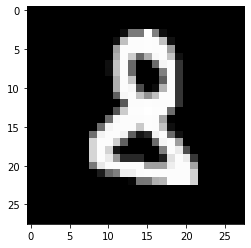

-----------------------------------------------
[errpr exalple56]
target : 6
Prediction : 5


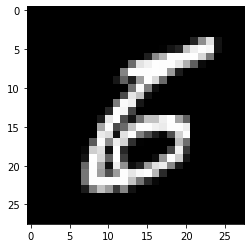

-----------------------------------------------
[errpr exalple57]
target : 8
Prediction : 3


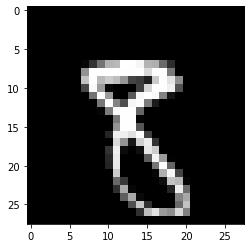

-----------------------------------------------
[errpr exalple58]
target : 0
Prediction : 4


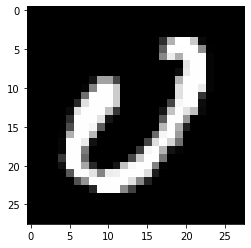

-----------------------------------------------
[errpr exalple59]
target : 4
Prediction : 9


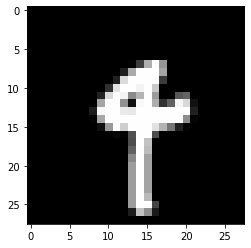

-----------------------------------------------
[errpr exalple60]
target : 2
Prediction : 0


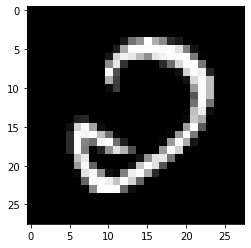

-----------------------------------------------
[errpr exalple61]
target : 3
Prediction : 2


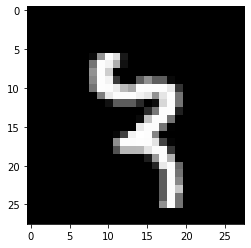

-----------------------------------------------
[errpr exalple62]
target : 6
Prediction : 0


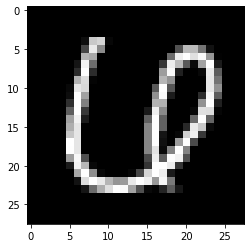

-----------------------------------------------
[errpr exalple63]
target : 6
Prediction : 1


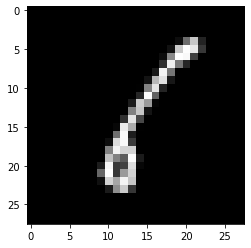

-----------------------------------------------
[errpr exalple64]
target : 1
Prediction : 2


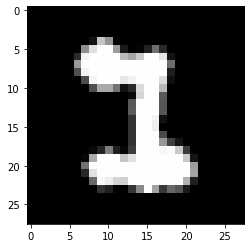

-----------------------------------------------
[errpr exalple65]
target : 8
Prediction : 0


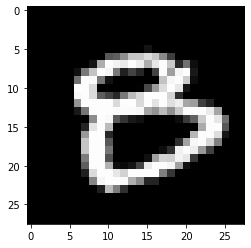

-----------------------------------------------
[errpr exalple66]
target : 3
Prediction : 9


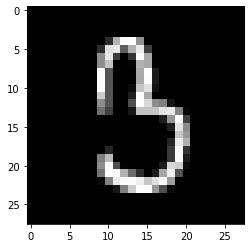

-----------------------------------------------
[errpr exalple67]
target : 5
Prediction : 7


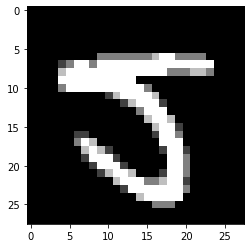

-----------------------------------------------
[errpr exalple68]
target : 9
Prediction : 5


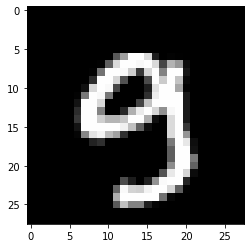

-----------------------------------------------
[errpr exalple69]
target : 9
Prediction : 4


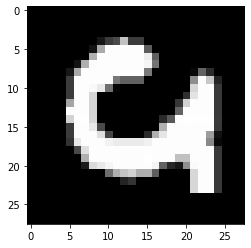

-----------------------------------------------
[errpr exalple70]
target : 9
Prediction : 1


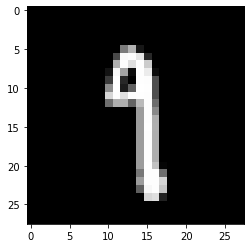

-----------------------------------------------
[errpr exalple71]
target : 9
Prediction : 4


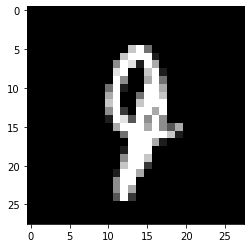

-----------------------------------------------
[errpr exalple72]
target : 6
Prediction : 4


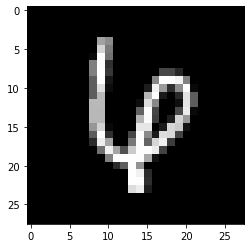

-----------------------------------------------
[errpr exalple73]
target : 2
Prediction : 4


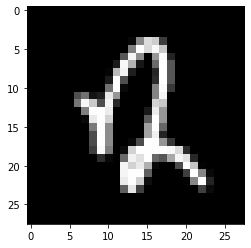

-----------------------------------------------
[errpr exalple74]
target : 5
Prediction : 3


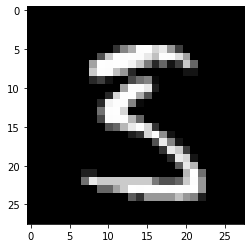

-----------------------------------------------
[errpr exalple75]
target : 7
Prediction : 1


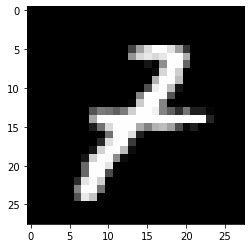

-----------------------------------------------
[errpr exalple76]
target : 9
Prediction : 5


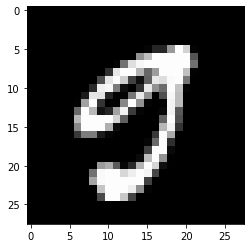

-----------------------------------------------
[errpr exalple77]
target : 6
Prediction : 1


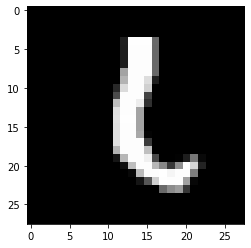

-----------------------------------------------
[errpr exalple78]
target : 9
Prediction : 4


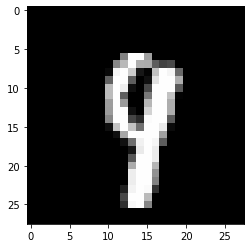

-----------------------------------------------
[errpr exalple79]
target : 8
Prediction : 5


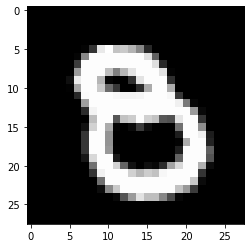

-----------------------------------------------
[errpr exalple80]
target : 9
Prediction : 4


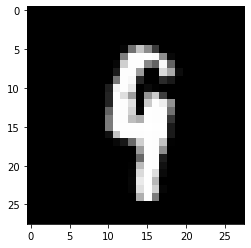

-----------------------------------------------
[errpr exalple81]
target : 3
Prediction : 2


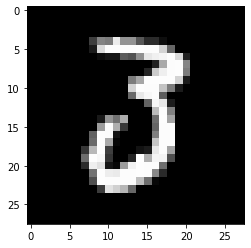

-----------------------------------------------
[errpr exalple82]
target : 9
Prediction : 5


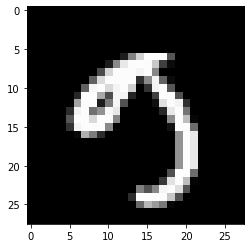

-----------------------------------------------
[errpr exalple83]
target : 9
Prediction : 4


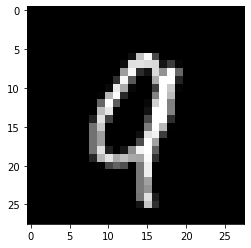

-----------------------------------------------
[errpr exalple84]
target : 1
Prediction : 2


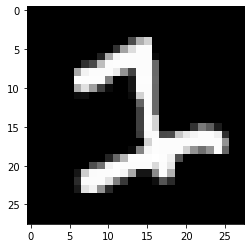

-----------------------------------------------
[errpr exalple85]
target : 5
Prediction : 9


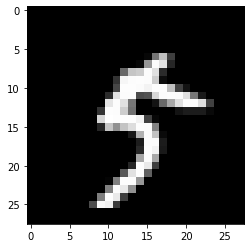

-----------------------------------------------
[errpr exalple86]
target : 2
Prediction : 7


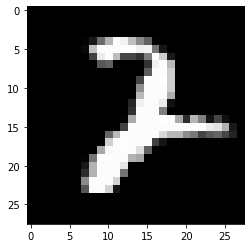

-----------------------------------------------
[errpr exalple87]
target : 8
Prediction : 2


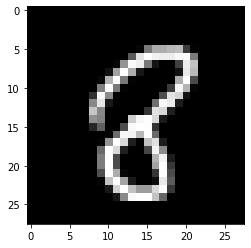

-----------------------------------------------
[errpr exalple88]
target : 3
Prediction : 7


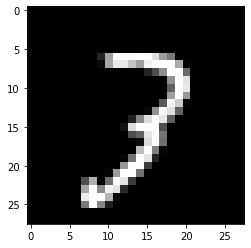

-----------------------------------------------
[errpr exalple89]
target : 9
Prediction : 1


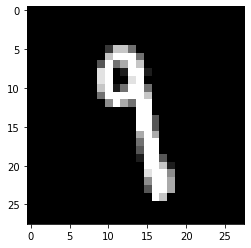

-----------------------------------------------
[errpr exalple90]
target : 6
Prediction : 4


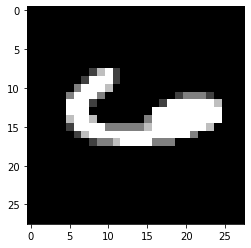

-----------------------------------------------
[errpr exalple91]
target : 3
Prediction : 2


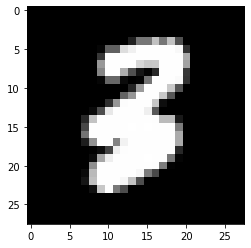

-----------------------------------------------
[errpr exalple92]
target : 5
Prediction : 0


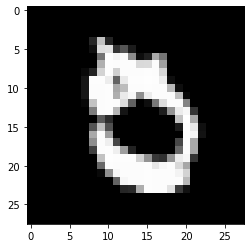

-----------------------------------------------
[errpr exalple93]
target : 8
Prediction : 5


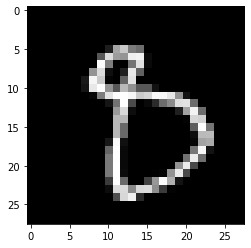

-----------------------------------------------
[errpr exalple94]
target : 8
Prediction : 5


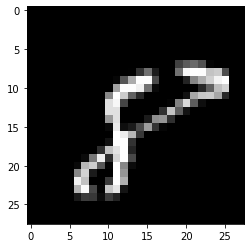

-----------------------------------------------
[errpr exalple95]
target : 8
Prediction : 6


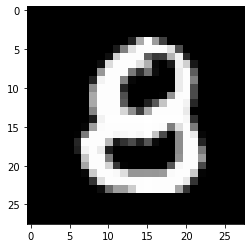

-----------------------------------------------
[errpr exalple96]
target : 5
Prediction : 3


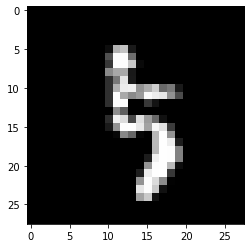

-----------------------------------------------
[errpr exalple97]
target : 8
Prediction : 4


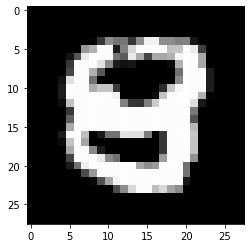

-----------------------------------------------
[errpr exalple98]
target : 8
Prediction : 3


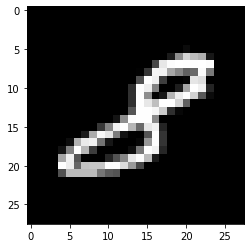

-----------------------------------------------
[errpr exalple99]
target : 5
Prediction : 2


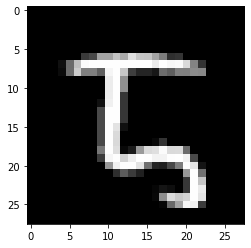

-----------------------------------------------
[errpr exalple100]
target : 8
Prediction : 2


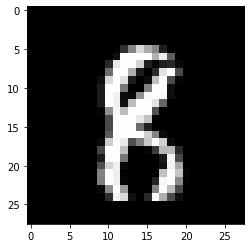

-----------------------------------------------
[errpr exalple101]
target : 2
Prediction : 4


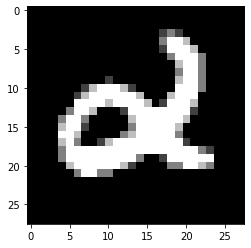

-----------------------------------------------
[errpr exalple102]
target : 6
Prediction : 0


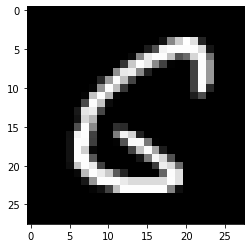

-----------------------------------------------
[errpr exalple103]
target : 5
Prediction : 6


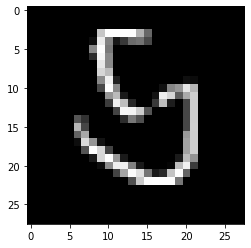

-----------------------------------------------
[errpr exalple104]
target : 1
Prediction : 2


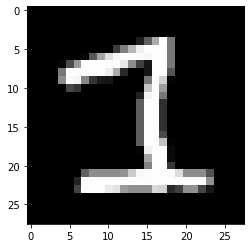

-----------------------------------------------
[errpr exalple105]
target : 4
Prediction : 2


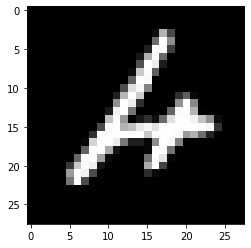

-----------------------------------------------
[errpr exalple106]
target : 7
Prediction : 1


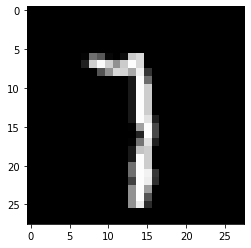

-----------------------------------------------
[errpr exalple107]
target : 9
Prediction : 4


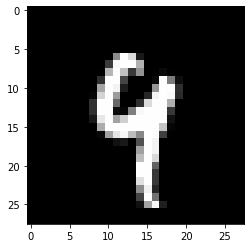

-----------------------------------------------
[errpr exalple108]
target : 9
Prediction : 8


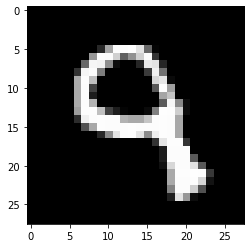

-----------------------------------------------
[errpr exalple109]
target : 0
Prediction : 2


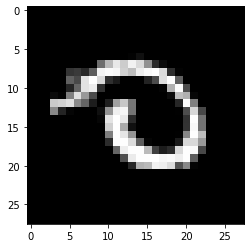

-----------------------------------------------
[errpr exalple110]
target : 9
Prediction : 7


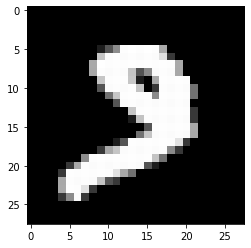

-----------------------------------------------
[errpr exalple111]
target : 8
Prediction : 2


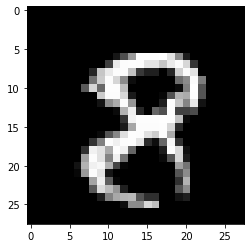

-----------------------------------------------
[errpr exalple112]
target : 8
Prediction : 2


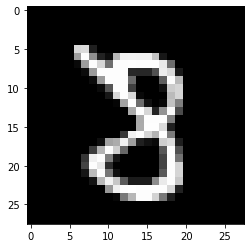

-----------------------------------------------
[errpr exalple113]
target : 8
Prediction : 2


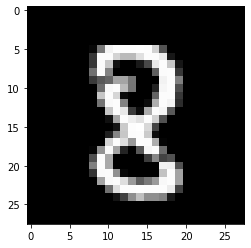

-----------------------------------------------
[errpr exalple114]
target : 8
Prediction : 3


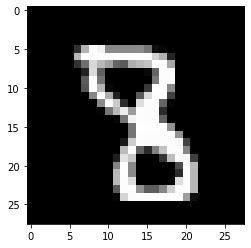

-----------------------------------------------
[errpr exalple115]
target : 9
Prediction : 7


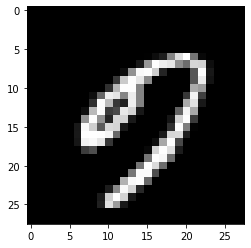

-----------------------------------------------
[errpr exalple116]
target : 2
Prediction : 7


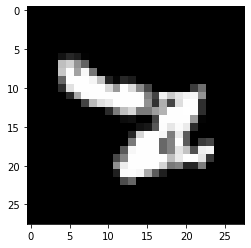

-----------------------------------------------
[errpr exalple117]
target : 1
Prediction : 7


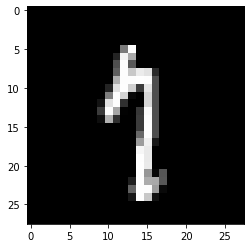

-----------------------------------------------
[errpr exalple118]
target : 8
Prediction : 2


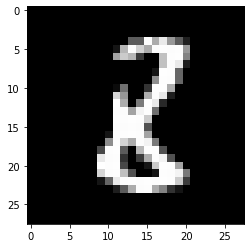

-----------------------------------------------
[errpr exalple119]
target : 9
Prediction : 7


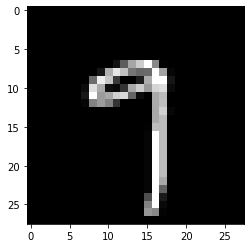

-----------------------------------------------
[errpr exalple120]
target : 2
Prediction : 8


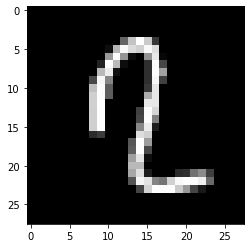

-----------------------------------------------
[errpr exalple121]
target : 9
Prediction : 5


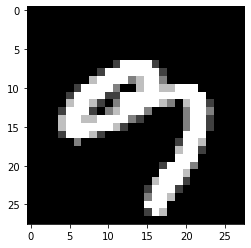

-----------------------------------------------
[errpr exalple122]
target : 9
Prediction : 5


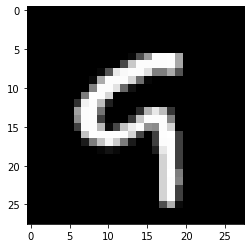

-----------------------------------------------
[errpr exalple123]
target : 9
Prediction : 7


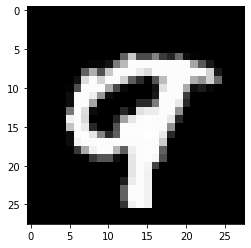

-----------------------------------------------
[errpr exalple124]
target : 6
Prediction : 5


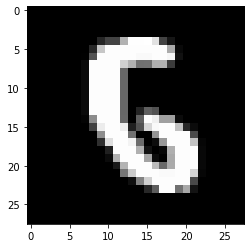

-----------------------------------------------
[errpr exalple125]
target : 6
Prediction : 4


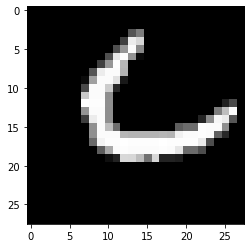

-----------------------------------------------
[errpr exalple126]
target : 3
Prediction : 5


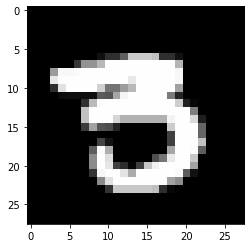

-----------------------------------------------
[errpr exalple127]
target : 2
Prediction : 4


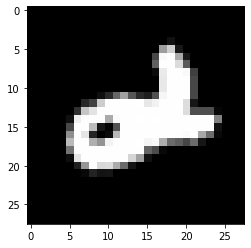

-----------------------------------------------
[errpr exalple128]
target : 3
Prediction : 5


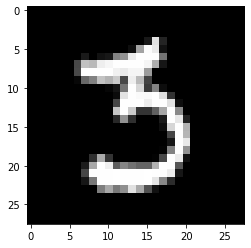

-----------------------------------------------
[errpr exalple129]
target : 2
Prediction : 7


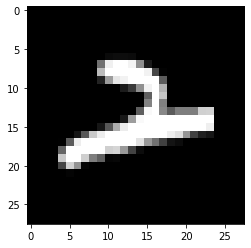

-----------------------------------------------
[errpr exalple130]
target : 8
Prediction : 9


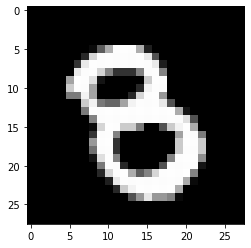

-----------------------------------------------
[errpr exalple131]
target : 8
Prediction : 0


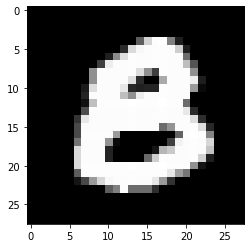

-----------------------------------------------
[errpr exalple132]
target : 8
Prediction : 3


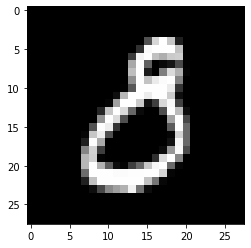

-----------------------------------------------
[errpr exalple133]
target : 9
Prediction : 4


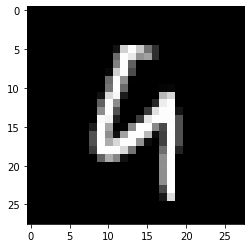

-----------------------------------------------
[errpr exalple134]
target : 2
Prediction : 4


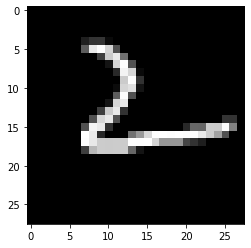

-----------------------------------------------
[errpr exalple135]
target : 8
Prediction : 6


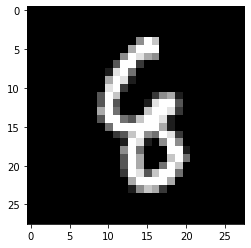

-----------------------------------------------
[errpr exalple136]
target : 8
Prediction : 3


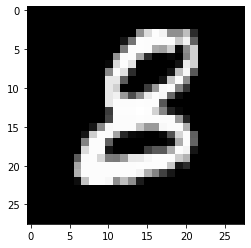

-----------------------------------------------
[errpr exalple137]
target : 8
Prediction : 4


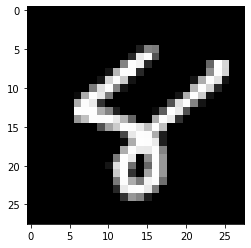

-----------------------------------------------
[errpr exalple138]
target : 6
Prediction : 4


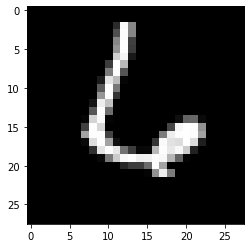

-----------------------------------------------
[errpr exalple139]
target : 6
Prediction : 4


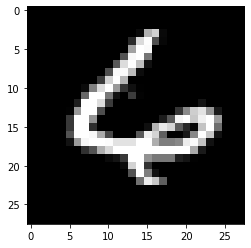

-----------------------------------------------
[errpr exalple140]
target : 1
Prediction : 6


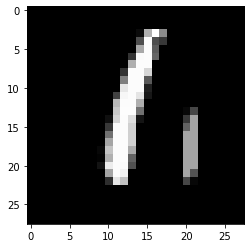

-----------------------------------------------
[errpr exalple141]
target : 1
Prediction : 2


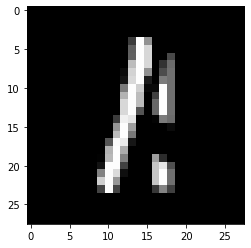

-----------------------------------------------
[errpr exalple142]
target : 1
Prediction : 8


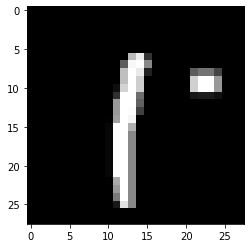

-----------------------------------------------
[errpr exalple143]
target : 4
Prediction : 2


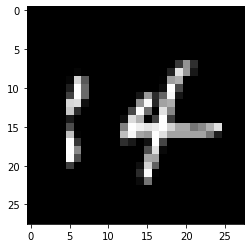

-----------------------------------------------
[errpr exalple144]
target : 3
Prediction : 2


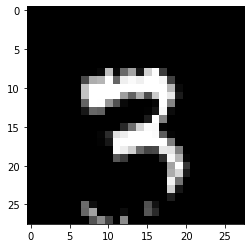

-----------------------------------------------
[errpr exalple145]
target : 8
Prediction : 2


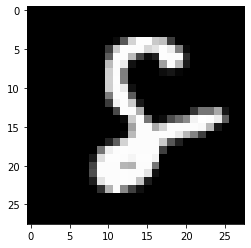

-----------------------------------------------
[errpr exalple146]
target : 7
Prediction : 0


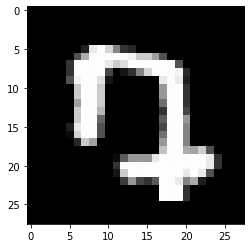

-----------------------------------------------
[errpr exalple147]
target : 3
Prediction : 8


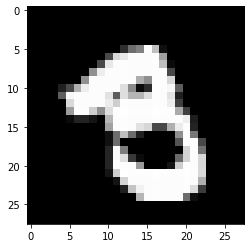

-----------------------------------------------
[errpr exalple148]
target : 3
Prediction : 9


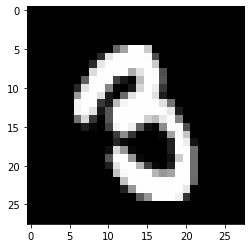

-----------------------------------------------
[errpr exalple149]
target : 5
Prediction : 3


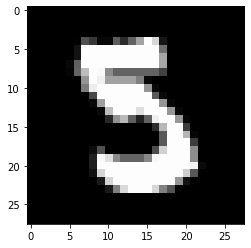

-----------------------------------------------
[errpr exalple150]
target : 5
Prediction : 9


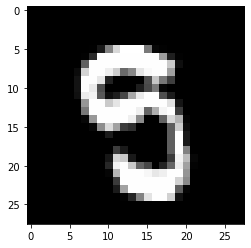

-----------------------------------------------
[errpr exalple151]
target : 3
Prediction : 9


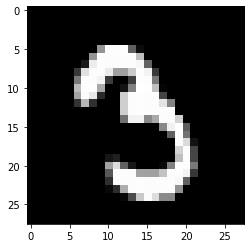

-----------------------------------------------
[errpr exalple152]
target : 3
Prediction : 9


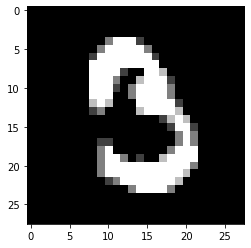

-----------------------------------------------
[errpr exalple153]
target : 8
Prediction : 3


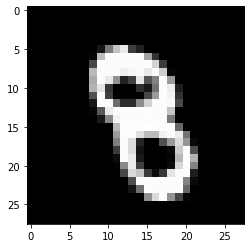

-----------------------------------------------
[errpr exalple154]
target : 8
Prediction : 2


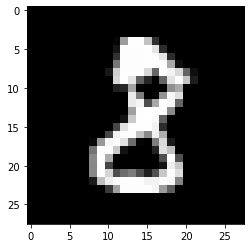

-----------------------------------------------
[errpr exalple155]
target : 9
Prediction : 4


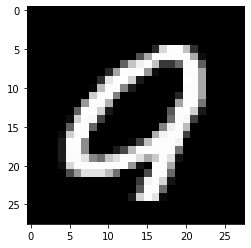

-----------------------------------------------
[errpr exalple156]
target : 9
Prediction : 7


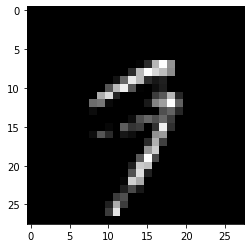

-----------------------------------------------
[errpr exalple157]
target : 2
Prediction : 6


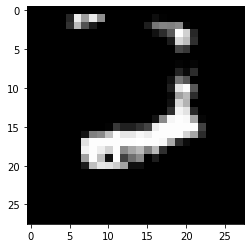

-----------------------------------------------
[errpr exalple158]
target : 7
Prediction : 1


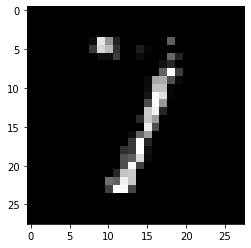

-----------------------------------------------
[errpr exalple159]
target : 0
Prediction : 7


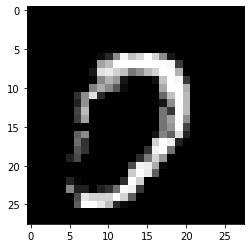

-----------------------------------------------
[errpr exalple160]
target : 8
Prediction : 2


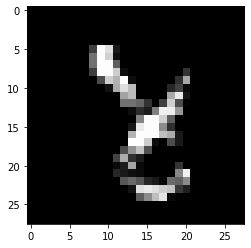

-----------------------------------------------
[errpr exalple161]
target : 0
Prediction : 5


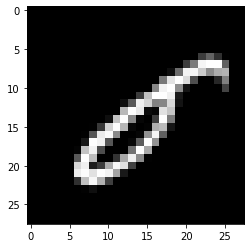

-----------------------------------------------
[errpr exalple162]
target : 7
Prediction : 2


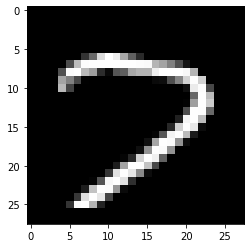

-----------------------------------------------
[errpr exalple163]
target : 8
Prediction : 9


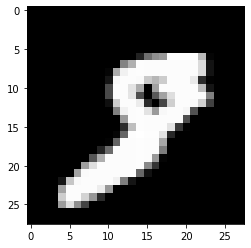

-----------------------------------------------
[errpr exalple164]
target : 1
Prediction : 6


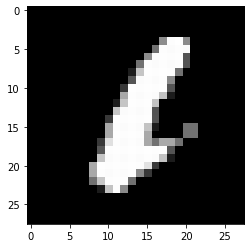

-----------------------------------------------
[errpr exalple165]
target : 6
Prediction : 4


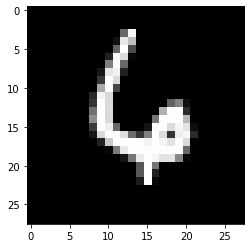

-----------------------------------------------
[errpr exalple166]
target : 0
Prediction : 3


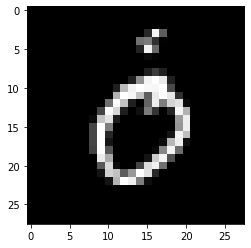

-----------------------------------------------
[errpr exalple167]
target : 3
Prediction : 5


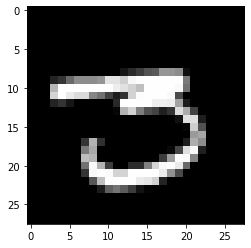

-----------------------------------------------
[errpr exalple168]
target : 8
Prediction : 2


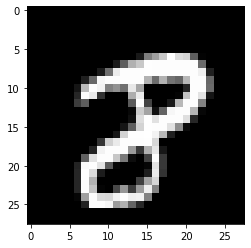

-----------------------------------------------
[errpr exalple169]
target : 8
Prediction : 6


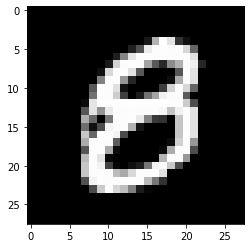

-----------------------------------------------
[errpr exalple170]
target : 8
Prediction : 2


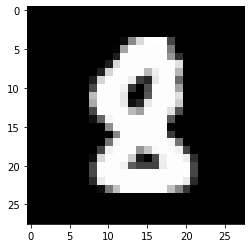

-----------------------------------------------
[errpr exalple171]
target : 8
Prediction : 2


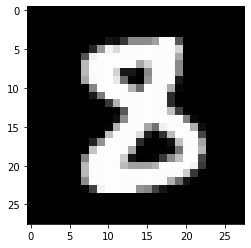

-----------------------------------------------
[errpr exalple172]
target : 3
Prediction : 2


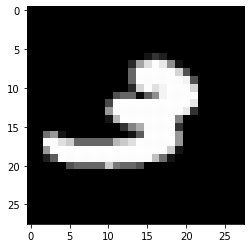

-----------------------------------------------
[errpr exalple173]
target : 3
Prediction : 2


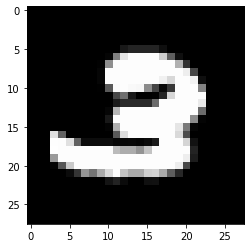

-----------------------------------------------
[errpr exalple174]
target : 8
Prediction : 2


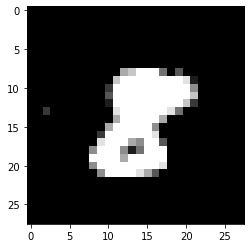

-----------------------------------------------
[errpr exalple175]
target : 8
Prediction : 0


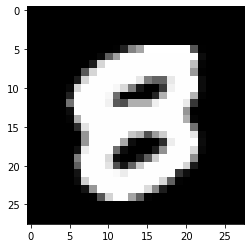

-----------------------------------------------
[errpr exalple176]
target : 3
Prediction : 9


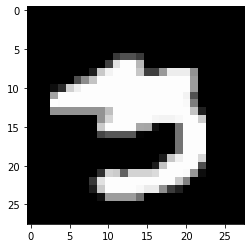

-----------------------------------------------
[errpr exalple177]
target : 6
Prediction : 4


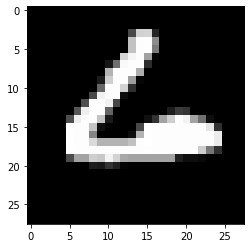

-----------------------------------------------
[errpr exalple178]
target : 0
Prediction : 6


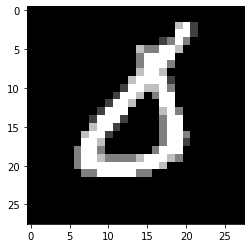

-----------------------------------------------
[errpr exalple179]
target : 3
Prediction : 5


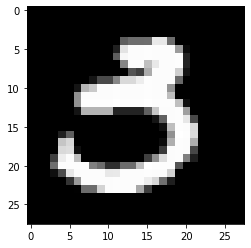

-----------------------------------------------
[errpr exalple180]
target : 8
Prediction : 6


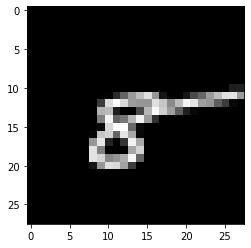

-----------------------------------------------
[errpr exalple181]
target : 8
Prediction : 5


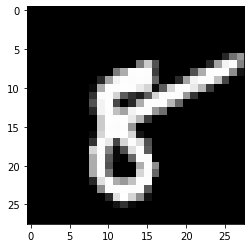

-----------------------------------------------
[errpr exalple182]
target : 8
Prediction : 0


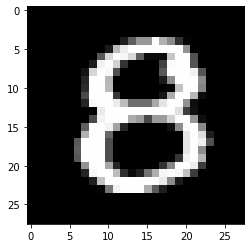

-----------------------------------------------
[errpr exalple183]
target : 4
Prediction : 9


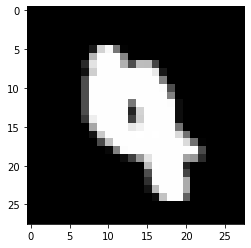

-----------------------------------------------
[errpr exalple184]
target : 7
Prediction : 2


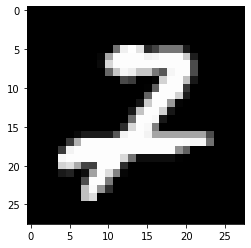

-----------------------------------------------
[errpr exalple185]
target : 7
Prediction : 2


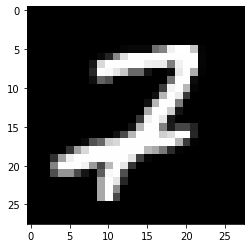

-----------------------------------------------
[errpr exalple186]
target : 3
Prediction : 9


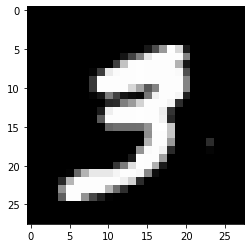

-----------------------------------------------
[errpr exalple187]
target : 8
Prediction : 5


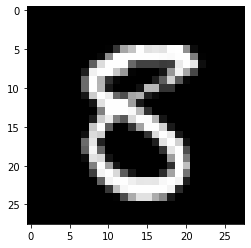

-----------------------------------------------
[errpr exalple188]
target : 8
Prediction : 5


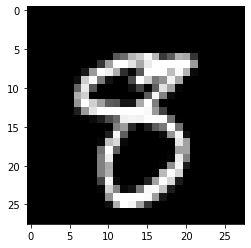

-----------------------------------------------
[errpr exalple189]
target : 5
Prediction : 3


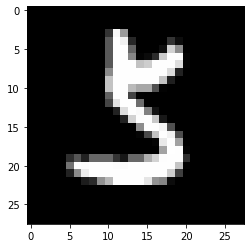

-----------------------------------------------
[errpr exalple190]
target : 9
Prediction : 8


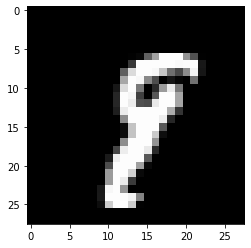

-----------------------------------------------
[errpr exalple191]
target : 9
Prediction : 4


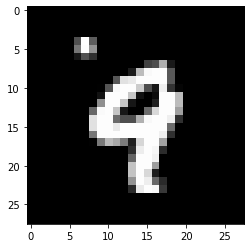

-----------------------------------------------
[errpr exalple192]
target : 8
Prediction : 2


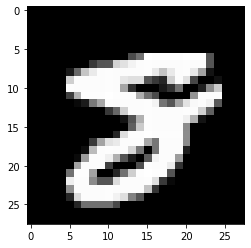

-----------------------------------------------
[errpr exalple193]
target : 0
Prediction : 1


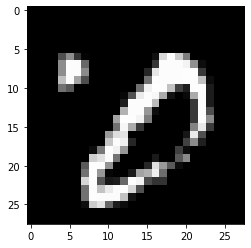

-----------------------------------------------
[errpr exalple194]
target : 2
Prediction : 7


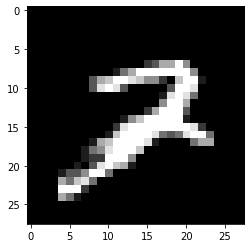

-----------------------------------------------
[errpr exalple195]
target : 6
Prediction : 3


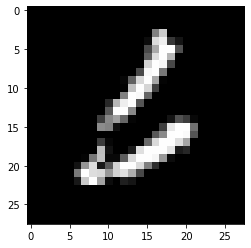

-----------------------------------------------
[errpr exalple196]
target : 9
Prediction : 7


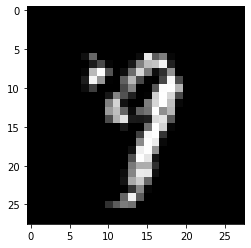

-----------------------------------------------
[errpr exalple197]
target : 9
Prediction : 7


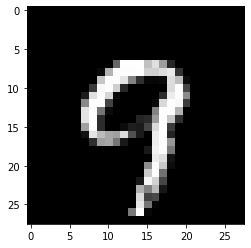

-----------------------------------------------
[errpr exalple198]
target : 5
Prediction : 6


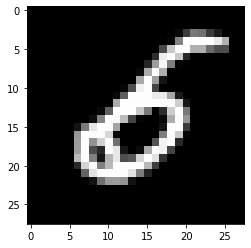

-----------------------------------------------
[errpr exalple199]
target : 5
Prediction : 0


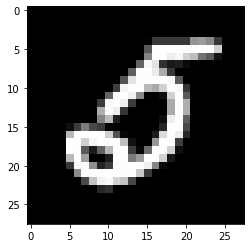

-----------------------------------------------
[errpr exalple200]
target : 6
Prediction : 5


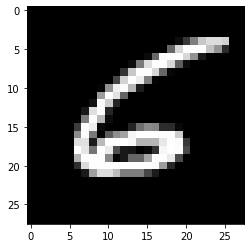

-----------------------------------------------
[errpr exalple201]
target : 4
Prediction : 9


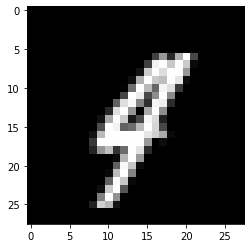

-----------------------------------------------
[errpr exalple202]
target : 9
Prediction : 4


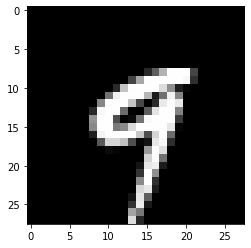

-----------------------------------------------
[errpr exalple203]
target : 2
Prediction : 7


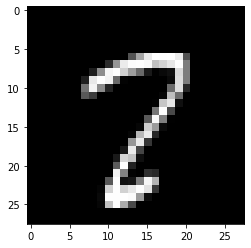

-----------------------------------------------
[errpr exalple204]
target : 0
Prediction : 2


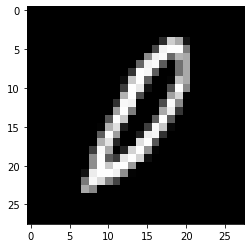

-----------------------------------------------
[errpr exalple205]
target : 3
Prediction : 5


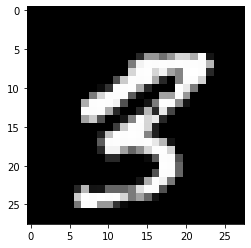

-----------------------------------------------


In [293]:
import random

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(Y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
predicted_labels
for i in range(0,len(wrong_result)):
  pick_image = np.reshape(X_test[wrong_result[i]], (1, 784))
  predict_result = np.argmax(model.predict(pick_image))
  print('[errpr exalple' + str(i)+']')
  print('target : ' + str(test_labels[wrong_result[i]]))
  print("Prediction : " + str(predict_result))
  image = np.reshape(X_test[wrong_result[i]], (28, 28))
  plt.imshow(image, cmap='gray')
  plt.show()
  print('-----------------------------------------------')
  